In [46]:
import pandas as pd
import numpy as np
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '/home/fangming/projects/myutils')
import importlib
import basicu

importlib.reload(basicu)

sns.set_context('talk')

# Metadata

In [2]:
f = '../data/candidate_genes_vincent_0316.xlsx'
df0 = pd.read_excel(f, sheet_name=0)
df1 = pd.read_excel(f, sheet_name=1)

print(df0.shape, df1.shape)

(103, 9) (13, 8)


In [3]:
df0

,Target Name,Not in Catatlog,Probe set size,HCR Amplifer to use with,Order (11/11/2021),Accession # (validated w/ CCDS),ABA Accession #,Order?,Unnamed: 8
0,Baz1a,NaN,20.0,B2,x - B2,NaN,NaN,y - B2,NaN
1,Agmat,NaN,20.0,"B2, B3",x - B3,NaN,NaN,NaN,NaN
2,Adamts2,NaN,20.0,"B1, B2, B3",x - B1,NaN,NaN,y - B1,NaN
3,Rrad,NaN,20.0,"B2, B3",NaN,NM_019662.3,NM_019662.1,y - B3,NaN
4,Trpc6,NaN,20.0,B1,x - B1,NaN,NaN,y - B1,NaN
...,...,...,...,...,...,...,...,...,...
98,Stard7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Cldn5,NaN,NaN,NaN,NaN,NM_013805.3,NM_013805.4,Y - B5,NaN
100,Chrm3,Y,20.0,NaN,NaN,NM_033269,NaN,Y - B2,NaN
101,Whrn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1

,Target Name,Not in Catatlog,Probe set size,HCR Amplifer to use with,Order (11/11/2021),Accession # (validated w/ CCDS),ABA Accession #,Order?
0,Slc1a3,Y,20.0,"B1, B2, B3, B4",NaN,NaN,NaN,NaN
1,Mertk,N,NaN,NaN,NaN,NaN,NaN,NaN
2,Rfx4,N,NaN,NaN,NaN,NaN,NaN,NaN
3,Clasp2,N,NaN,NaN,NaN,NaN,NaN,NaN
4,Ntrk2(TrkB),Y,20.0,"B2, B3, B4, B5",NaN,NaN,NaN,NaN
5,Chrdl1,N,NaN,NaN,NaN,NaN,NaN,NaN
6,Id3,Y,14.0,"B2, B3",NaN,NaN,NaN,NaN
7,Nrxn1,N,NaN,NaN,NaN,NaN,NaN,NaN
8,Il33,N,NaN,NaN,NaN,NaN,NaN,NaN
9,Scel,N,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
%%time
adata = ad.read('/bigstore/GeneralStorage/fangming/visctx/P38_glut_10genes.h5ad')
adata_dr = ad.read('/bigstore/GeneralStorage/fangming/visctx/P38_glut_dr_10genes.h5ad')
adata

CPU times: user 528 ms, sys: 11.1 s, total: 11.6 s
Wall time: 13.9 s


AnnData object with n_obs × n_vars = 10485 × 10
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'sample', 'Age', 'subclass', 'layer', 'Type', 'Subclass'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Type_colors', 'cluster_colors', "dendrogram_['leiden']", 'hvg', 'layer_colors', 'leiden', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

# Explore cluster level

In [23]:
Xk, xclsts = basicu.group_mean(adata.X, adata.obs['cluster'].values,)
Xk = np.array(Xk)
Xk = pd.DataFrame(Xk, index=xclsts, columns=adata.var.index.values)
Xk.shape, xclsts.shape, xclsts

((16, 10),
 (16,),
 array(['L2/3_A', 'L2/3_B', 'L2/3_C', 'L4_A', 'L4_B', 'L4_C', 'L5IT',
        'L5NP', 'L5PT_A', 'L5PT_B', 'L6CT_A', 'L6CT_B', 'L6CT_C', 'L6IT_A',
        'L6IT_B', 'L6b'], dtype=object))

In [65]:
Yk, yclsts = basicu.group_mean(adata_dr.X, adata_dr.obs['cluster'].values,)
Yk = np.array(Yk)
Yk = pd.DataFrame(Yk, index=yclsts, columns=adata_dr.var.index.values)
Yk.shape, yclsts.shape, yclsts

((17, 10),
 (17,),
 array(['11', '5', 'L2/3_2', 'L2/3_3', 'L4_1', 'L4_2', 'L4_A', 'L5IT',
        'L5NP', 'L5PT_A', 'L5PT_B', 'L6CT_A', 'L6CT_B', 'L6CT_C', 'L6IT_A',
        'L6IT_B', 'L6b'], dtype=object))

In [60]:
gene_order = [
    'Igfn1',
    'Trpc6',
    'Baz1a',
    'Epha3',
    
    'Cdh13', 
    'Adamts2',
    
    'Chrm2',
    'Kcna1',
    
    'Gria3',
    'Whrn',
]

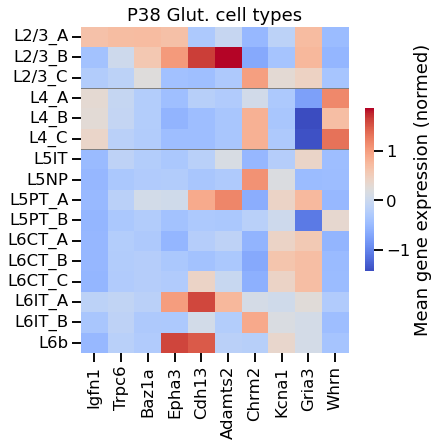

In [63]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(Xk[gene_order], 
            cmap='coolwarm', 
            cbar_kws=dict(shrink=0.5, label='Mean gene expression (normed)'),
            ax=ax)
ax.axhline(3, color='gray', linewidth=1)
ax.axhline(6, color='gray', linewidth=1)
ax.set_title('P38 Glut. cell types')
plt.show()

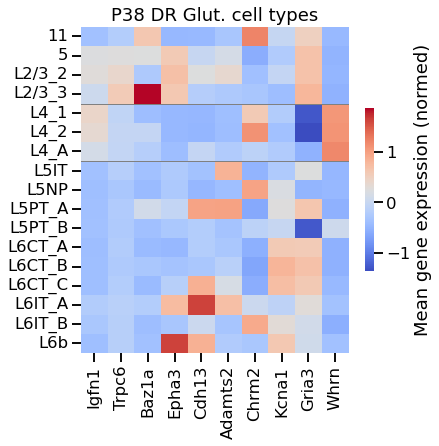

In [68]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(Yk[gene_order], 
            cmap='coolwarm', 
            cbar_kws=dict(shrink=0.5, label='Mean gene expression (normed)'),
            ax=ax)
ax.axhline(4, color='gray', linewidth=1)
ax.axhline(7, color='gray', linewidth=1)
ax.set_title('P38 DR Glut. cell types')
plt.show()

# Explore cell level

In [134]:
adataX = adata[adata.obs['cluster'].str.contains('L2/3|L4')].copy()
adataX.obs['index'] = np.arange(len(adataX))
adataX.obs['clst'] = adataX.obs['cluster'].astype(str) # sort properly

In [135]:
adataX.obs['clst'].unique()

array(['L2/3_A', 'L4_A', 'L4_B', 'L2/3_C', 'L4_C', 'L2/3_B'], dtype=object)

In [136]:
adataX.obs.sort_values(['clst', 'n_counts'])['clst'].unique()

array(['L2/3_A', 'L2/3_B', 'L2/3_C', 'L4_A', 'L4_B', 'L4_C'], dtype=object)

In [137]:
adata_meta = adataX.obs.sort_values(['clst', 'n_counts'])
cell_order = adata_meta['index'].values

dfX = pd.DataFrame(
    adataX.X[cell_order,:],
    index=adata_meta.index,
    columns=adata.var.index,
)[gene_order]
dfX

,Igfn1,Trpc6,Baz1a,Epha3,Cdh13,Adamts2,Chrm2,Kcna1,Gria3,Whrn
AGAAGTACATATACCG-1-P38_2a-P38,-0.548240,5.261216,-0.298222,-0.726854,-0.500343,-0.353857,-0.683110,-0.631392,-2.000220,-0.553964
AGCGTCGCAAAGGCTG-1-P38_1a-P38,-0.548240,-0.375199,-0.298222,3.583193,-0.500343,-0.353857,-0.683110,-0.631392,-2.000220,-0.553964
AGATGAAAGCAACAGC-1-P38_2a-P38,-0.548240,-0.375199,-0.298222,2.228634,-0.500343,4.605747,-0.683110,-0.631392,-0.337545,-0.553964
CCATCACCAGCTGGTC-1-P38_1a-P38,-0.548240,-0.375199,-0.298222,-0.726854,1.912442,-0.353857,-0.683110,-0.631392,1.181345,-0.553964
CATCGCTAGAATTGTG-1-P38_1a-P38,-0.548240,-0.375199,-0.298222,3.075032,-0.500343,-0.353857,-0.683110,-0.631392,1.286807,-0.553964
...,...,...,...,...,...,...,...,...,...,...
GTAGAAAGTCGCTCGA-1-P38_2b-P38,0.339136,0.753852,-0.298222,-0.726854,-0.500343,-0.353857,1.952843,-0.631392,-1.617452,2.073658
GCTTCACTCTTCCCAG-1-P38_2b-P38,0.338366,-0.375199,-0.298222,-0.726854,0.077531,-0.353857,1.540496,0.320382,-1.343174,0.747331
GATAGCTAGACGACGT-1-P38_1a-P38,1.421312,-0.375199,-0.298222,-0.068275,-0.500343,-0.353857,1.499299,1.482926,0.135379,2.017399
TCAATCTCACCGCTGA-1-P38_2b-P38,0.236337,-0.375199,-0.298222,-0.726854,-0.500343,-0.353857,1.869357,0.210853,-1.410525,0.613940


In [140]:
clst_sizes = adata_meta['clst'].value_counts(sort=False)
clst_sizes

L2/3_A    1971
L2/3_B     236
L2/3_C     611
L4_A       784
L4_B       955
L4_C      1280
Name: clst, dtype: int64

In [141]:
np.cumsum(clst_sizes)

L2/3_A    1971
L2/3_B    2207
L2/3_C    2818
L4_A      3602
L4_B      4557
L4_C      5837
Name: clst, dtype: int64

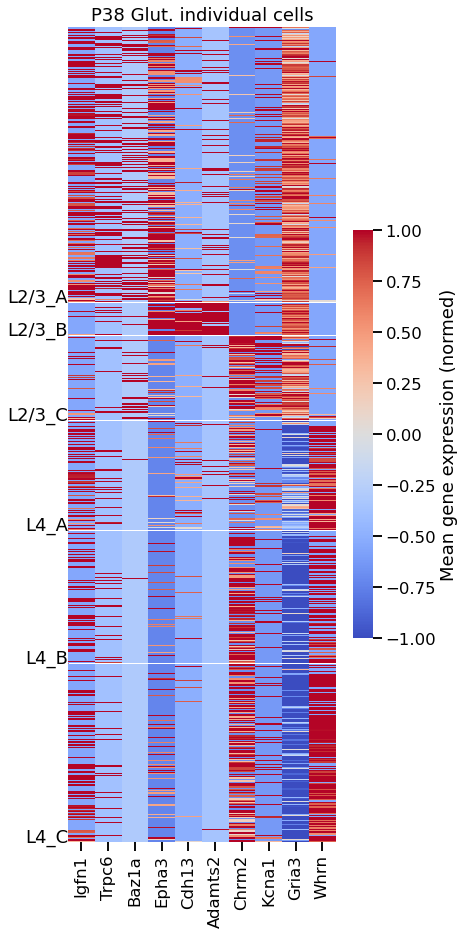

In [146]:
fig, ax = plt.subplots(figsize=(6, 15))
sns.heatmap(dfX, 
            yticklabels=False,
            cmap='coolwarm', 
            cbar_kws=dict(shrink=0.5, label='Mean gene expression (normed)'),
            vmax=1,
            vmin=-1,
            ax=ax)

ax.hlines(np.cumsum(clst_sizes), xmin=0, xmax=dfX.shape[1], 
          color='white', 
          linewidth=1,
         )
for clst, y in np.cumsum(clst_sizes).iteritems():
    ax.text(0, y, clst, ha='right')
ax.set_title('P38 Glut. individual cells')
plt.show()

# classsification based of the 10 genes

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics 

In [172]:
# data
X = dfX.values
y = adata_meta['clst'].str.contains('L2/3')

In [220]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
ps = []
rs = []
auprs = []
for train_idx, test_idx, in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # train
    lrf = LogisticRegression(random_state=0).fit(X_train,y_train)
    # test
    yp = lrf.predict_proba(X_test)
    # evaluation
    p, r, th = metrics.precision_recall_curve(y_test.values.astype(int), yp[:,1])
    pidx = np.argsort(p)
    p = p[pidx]
    r = r[pidx]
    
    p = np.hstack([0, p, 1])
    r = np.hstack([1, r, 0])
    aupr = metrics.auc(p, r)
    
    ps.append(p)
    rs.append(r)
    auprs.append(aupr)

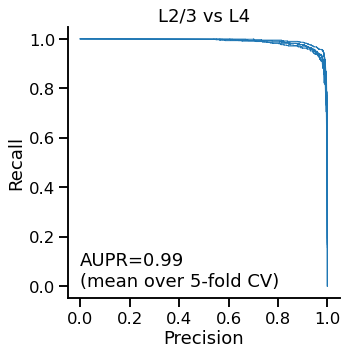

In [232]:
# plot
fig, ax = plt.subplots(figsize=(5,5))
for p, r in zip(ps, rs):
    ax.plot(p, r, color='C0', linewidth=1)
ax.text(0,0, f"AUPR={np.mean(auprs):.2f}\n(mean over 5-fold CV)")
sns.despine(ax=ax)
ax.set_aspect('equal')
ax.set_xticks(np.linspace(0,1,6))
ax.set_yticks(np.linspace(0,1,6))
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title(f'L2/3 vs L4')
plt.show()

# within L2/3

In [233]:
# data
cond = adata_meta['clst'].str.contains('L2/3')
adata_meta_l23 = adata_meta[cond]
dfX_l23 = dfX.loc[adata_meta_l23.index]

In [245]:
def classifier_pipe(X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    ps = []
    rs = []
    auprs = []
    for train_idx, test_idx, in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # train
        lrf = LogisticRegression(random_state=0).fit(X_train,y_train)
        # test
        yp = lrf.predict_proba(X_test)
        # evaluation
        p, r, th = metrics.precision_recall_curve(y_test.values.astype(int), yp[:,1])
        pidx = np.argsort(p)
        p = p[pidx]
        r = r[pidx]

        p = np.hstack([0, p, 1])
        r = np.hstack([1, r, 0])
        aupr = metrics.auc(p, r)

        ps.append(p)
        rs.append(r)
        auprs.append(aupr)
    return ps, rs, auprs

def plot_pipe(ax, ps, rs, auprs):
    for p, r in zip(ps, rs):
        ax.plot(p, r, color='C0', linewidth=1)
    ax.text(0,0, f"AUPR={np.mean(auprs):.2f}\n(mean over 5-fold CV)")
    sns.despine(ax=ax)
    ax.set_aspect('equal')
    ax.set_xticks(np.linspace(0,1,6))
    ax.set_yticks(np.linspace(0,1,6))
    ax.set_xlabel('Precision')
    ax.set_ylabel('Recall')
    return ax

In [249]:
X = dfX_l23.values 

y_a = adata_meta_l23['clst'].str.contains('L2/3_A') 
y_b = adata_meta_l23['clst'].str.contains('L2/3_B') 
y_c = adata_meta_l23['clst'].str.contains('L2/3_C') 

ps_a, rs_a, auprs_a = classifier_pipe(X, y_a)
ps_b, rs_b, auprs_b = classifier_pipe(X, y_b)
ps_c, rs_c, auprs_c = classifier_pipe(X, y_c)

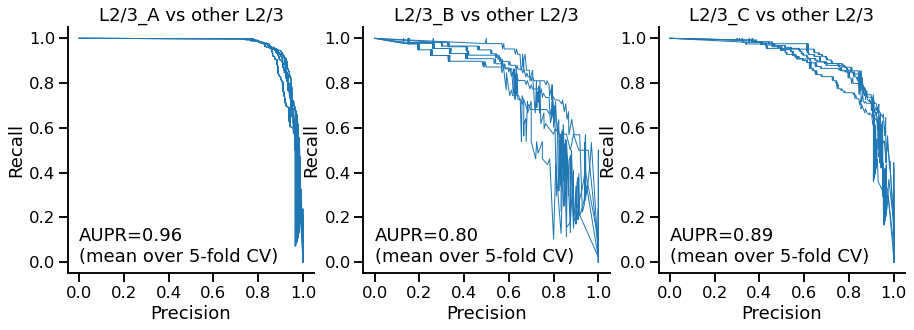

In [253]:
fig, axs = plt.subplots(1,3,figsize=(5*3,5))
ax = axs[0]
plot_pipe(ax, ps_a, rs_a, auprs_a)
ax.set_title(f'L2/3_A vs other L2/3')

ax = axs[1]
plot_pipe(ax, ps_b, rs_b, auprs_b)
ax.set_title(f'L2/3_B vs other L2/3')

ax = axs[2]
plot_pipe(ax, ps_c, rs_c, auprs_c)
ax.set_title(f'L2/3_C vs other L2/3')
plt.show()